In [5]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy

In [6]:
## Baseline simulator parameters
n_genes = 128
n_vaccines = 3 # DO NOT CHANGE, breaks the simulator.
n_treatments = 4
n_population = 10000
n_symptoms = 10
#batch_size = 2000

#assert n_population/batch_size == n_population//batch_size, 'the batch size must evenly divide the number of people'

In [7]:
population = Population(n_genes, n_vaccines, n_treatments)

In [8]:
X = population.generate(n_population)
n_features = X.shape[1]

In [9]:
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(array([1.570e+02, 5.770e+02, 9.610e+02, 1.158e+03, 1.220e+03, 1.111e+03,
        1.001e+03, 8.600e+02, 7.000e+02, 5.730e+02, 4.230e+02, 3.210e+02,
        2.330e+02, 2.050e+02, 1.350e+02, 1.020e+02, 8.300e+01, 5.800e+01,
        3.900e+01, 2.000e+01, 2.300e+01, 1.300e+01, 1.100e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.87620595,   5.77366804,  10.67113012,  15.56859221,
         20.46605429,  25.36351638,  30.26097846,  35.15844055,
         40.05590263,  44.95336472,  49.8508268 ,  54.74828889,
         59.64575097,  64.54321306,  69.44067514,  74.33813723,
         79.23559931,  84.1330614 ,  89.03052348,  93.92798557,
         98.82544765, 103.72290973, 108.62037182, 113.5178339 ,
        118.41529599, 123.31275807, 128.21022016, 133.10768224,
        138.00514433, 142.90260641, 147.8000685 ]),
 <BarContainer object of 30 artists>)

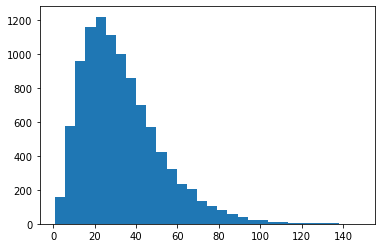

In [10]:
plt.hist(X[:,10], bins=30)

(array([2.612e+03, 1.925e+03, 1.480e+03, 1.015e+03, 8.310e+02, 5.210e+02,
        4.210e+02, 3.240e+02, 2.220e+02, 1.750e+02, 1.100e+02, 9.200e+01,
        6.900e+01, 5.900e+01, 4.400e+01, 2.500e+01, 1.200e+01, 1.800e+01,
        8.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2.50887924e-01, 3.01226853e+03, 6.02428617e+03, 9.03630381e+03,
        1.20483214e+04, 1.50603391e+04, 1.80723567e+04, 2.10843744e+04,
        2.40963920e+04, 2.71084096e+04, 3.01204273e+04, 3.31324449e+04,
        3.61444626e+04, 3.91564802e+04, 4.21684978e+04, 4.51805155e+04,
        4.81925331e+04, 5.12045508e+04, 5.42165684e+04, 5.72285860e+04,
        6.02406037e+04, 6.32526213e+04, 6.62646390e+04, 6.92766566e+04,
        7.22886742e+04, 7.53006919e+04, 7.83127095e+04, 8.13247272e+04,
        8.43367448e+04, 8.73487624e+04, 9.03607801e+04]),
 <BarContainer object of 30 artists>)

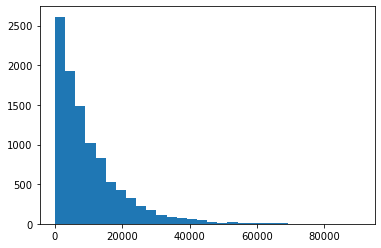

In [11]:
plt.hist(X[:,12], bins=30)

In [12]:
def u(x, value):
    
    v_cnts = np.unique(x, return_counts=True)

    return v_cnts[1][value] / v_cnts[1].sum()
    
def exponential(x, R, u, sensitivity, epsilon, n=1):
    scores = u(x, R) # score each element in R
    probs = np.exp(epsilon*scores / 2 / sensitivity)
    probs /= probs.sum()
    return np.random.choice(R, n, p=probs)

X_new = np.zeros((n_population, n_features))

for i in range(n_features):
    leng = len(np.unique(X[:,i].astype(int)))
    e = exponential(X[:,i].astype(int), np.arange(0,leng), u, 1, 100, n=n_population)
    
    X_new[:,i] = e

print(np.shape(X))
print(np.shape(X_new))

(10000, 150)
(10000, 150)


In [13]:
def exp_data(data, epsilon):
    n_features = data.shape[1]
    
    for i in range(n_features):
        leng = len(np.unique(data[:,i].astype(int)))
        e = exponential(data[:,i].astype(int), np.arange(0,leng), u, 1, epsilon, n=n_population)
        
        X_new[:,i] = e
    
    return X_new
    

In [33]:
varia = ['age', 'gender','income']
var_num = [10,11,12]


In [34]:
def plot_expo(data, varia, var_num):
    for i in range(len(varia)): 
        plt.hist(data[:,var_num[i]],bins=30)
        plt.title("Histogram after exponential mechanism")
        plt.xlabel(varia[i])
        plt.ylabel("frequency")
        plt.savefig('figures/histogram_exp_mech_' + varia[i] + '.png')
        plt.show()
    

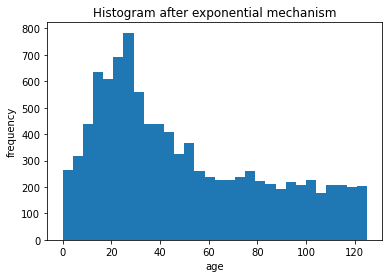

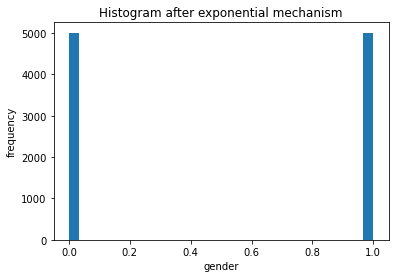

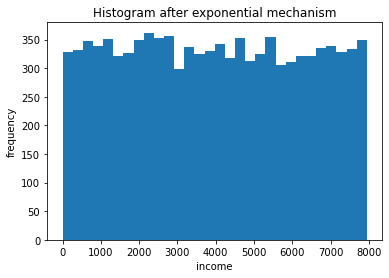

"\nplot_expo(X_exp, feature=10)\nplt.xlabel(varia[i])\nplt.savefig('figures/hist_exp_mech_age.png')\nplt.show()\nplot_expo(X_exp, feature=11)\nplt.savefig('figures/hist_exp_mech_gender.png')\nplt.show()\nplot_expo(X_exp, feature=12)\nplt.savefig('figures/hist_exp_mech_salary.png')\nplt.show()\n"

In [35]:
X_exp = exp_data(X, epsilon=100)
plot_expo(X_exp, varia, var_num)


"""
plot_expo(X_exp, feature=10)
plt.xlabel(varia[i])
plt.savefig('figures/hist_exp_mech_age.png')
plt.show()
plot_expo(X_exp, feature=11)
plt.savefig('figures/hist_exp_mech_gender.png')
plt.show()
plot_expo(X_exp, feature=12)
plt.savefig('figures/hist_exp_mech_salary.png')
plt.show()
"""

(array([276., 321., 447., 723., 603., 661., 788., 520., 451., 355., 450.,
        291., 265., 305., 244., 223., 309., 216., 198., 208., 248., 185.,
        201., 241., 220., 183., 249., 207., 184., 228.]),
 array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
         38.7,  43. ,  47.3,  51.6,  55.9,  60.2,  64.5,  68.8,  73.1,
         77.4,  81.7,  86. ,  90.3,  94.6,  98.9, 103.2, 107.5, 111.8,
        116.1, 120.4, 124.7, 129. ]),
 <BarContainer object of 30 artists>)

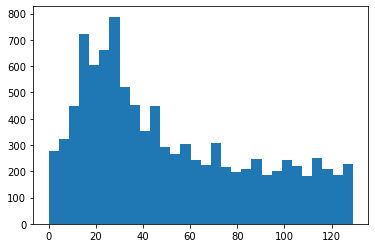

In [302]:
plt.hist(X_new[:,10],bins=30)